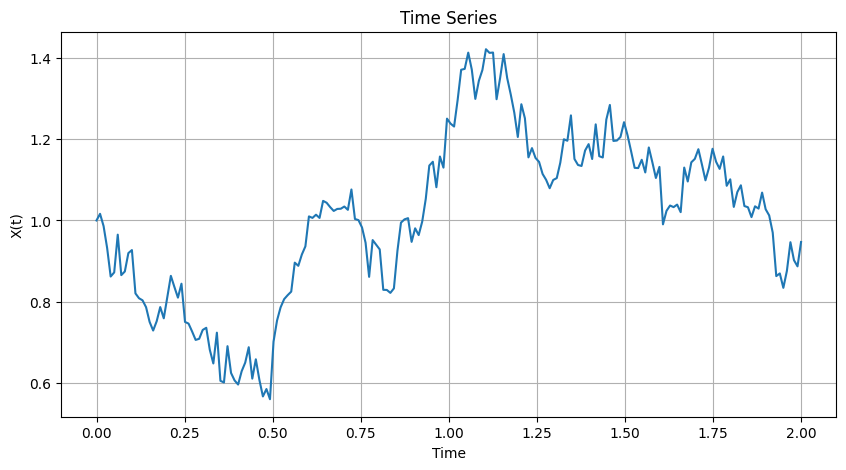

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_ou_process(
    theta=0.7,      # Speed of mean reversion: higher values pull X(t) faster towards the mean
    mu=0.0,         # Long-term mean: the value to which the process tends to revert
    sigma=0.3,      # Volatility: the intensity of the random fluctuations (Brownian motion component)
    x0=0.0,         # Initial value of the process
    T=1.0,          # Total time
    dt=0.01,        # Time step
    seed=None       # Random seed for reproducibility
):
    if seed is not None:
        np.random.seed(seed)

    N = int(T / dt)               # Number of time steps
    t = np.linspace(0, T, N)      # Time grid
    X = np.zeros(N)               # Array to store the process values
    X[0] = x0                     # Initial value

    for i in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))  # Brownian increment
        X[i] = X[i-1] + theta * (mu - X[i-1]) * dt + sigma * dW

    return t, X

# Parameters for simulation
params = {
    'theta': 1.0,  # Try changing this to see how fast the process mean-reverts
    'mu': 1.0,     # TS will mean-revert towards mu. Try changing this to see how the long-term mean affects the trajectory
    'sigma': 0.5,  # Try increasing for more randomness
    'x0': 1.0,     # Change this to simulate increasing/decreasing patterns
    'T': 2.0,      
    'dt': 0.01,
    'seed': None    # Set a seed for reproducibility
}

# Run simulation
t, X = simulate_ou_process(**params)

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(t, X )
plt.title('Time Series')
plt.xlabel('Time')
plt.ylabel('X(t)')
plt.grid(True)
# now save the picture to a png file
plt.savefig('ou_process.png')
plt.show()
